# Import libraries and test functions

In [17]:
import tensorflow as tf
import pandas as pd
from tensorflow.contrib.predictor import from_saved_model
import s3fs

In [18]:
tf.__version__ #check the version of tf

'1.15.5'

In [19]:
!saved_model_cli show --all --dir model #save model


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['predict_images']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['image_bytes'] tensor_info:
        dtype: DT_STRING
        shape: (-1)
        name: ParseExample/ParseExample:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['classes'] tensor_info:
        dtype: DT_STRING
        shape: (-1, 4)
        name: index_to_string_Lookup:0
    outputs['scores'] tensor_info:
        dtype: DT_FLOAT
        shape: (-1, 4)
        name: TopKV2:0
  Method name is: tensorflow/serving/predict

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['image_bytes'] tensor_info:
        dtype: DT_STRING
        shape: (-1)
        name: ParseExample/ParseExample:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['classes'] tensor_info:
        dtype: DT_

In [20]:
model=from_saved_model("model")
fs = s3fs.S3FileSystem() #call the s3fs to operate the filesystem

Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.loader.load or tf.compat.v1.saved_model.load. There will be a new function for importing SavedModels in Tensorflow 2.0.
INFO:tensorflow:Restoring parameters from model/variables/variables


In [620]:
image = fs.ls('s3:/...') 
image[:10] #Check the format of image

['ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BASE_171115_080723_1.jpg',
 'ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BRITE_171115_082055_1.jpg',
 'ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BRITE_171115_095702_1.jpg',
 'ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BRITE_171115_185822_1.jpg',
 'ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A02-1_BASE_171115_080731_1.jpg',
 'ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A02-1_BRITE_171115_082102_1.jpg',
 'ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A02-1_BRITE_171115_095709_1.jpg',
 'ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A02-1_BRITE_171115_185824_1.jpg',
 'ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A03-1_BASE_171115_080738_1.jpg',
 'ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A03-1_BRITE_171115_082108_1.jpg']

In [622]:
fs.info('s3://...')['type'] == 'directory'#to check if the file is the dire
fs.isfile('s3://...')
fs.info('s3://...')

{'Key': 'ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BASE_171115_080723_1.jpg',
 'LastModified': datetime.datetime(2021, 12, 21, 18, 41, 11, tzinfo=tzlocal()),
 'ETag': '"7629f95f763ac2bb0787df09fcb3c293"',
 'Size': 128466,
 'StorageClass': 'STANDARD',
 'type': 'file',
 'size': 128466,
 'name': 'ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BASE_171115_080723_1.jpg'}

In [337]:
fs.ls('s3://...')

['ingo-images/SMARCA2/Default/xdfp11-001',
 'ingo-images/SMARCA2/Default/xdfp11-002',
 'ingo-images/SMARCA2/Default/xdfp11-003',
 'ingo-images/SMARCA2/Default/xdfp11-004',
 'ingo-images/SMARCA2/Default/xdfp11-005',
 'ingo-images/SMARCA2/Default/xdfp11-006',
 'ingo-images/SMARCA2/Default/xdfp11-007',
 'ingo-images/SMARCA2/Default/xdfp11-008',
 'ingo-images/SMARCA2/Default/xdfp11-009',
 'ingo-images/SMARCA2/Default/xdfp11-010',
 'ingo-images/SMARCA2/Default/xdfp11-011',
 'ingo-images/SMARCA2/Default/xdfp11-012',
 'ingo-images/SMARCA2/Default/xdfp11-013',
 'ingo-images/SMARCA2/Default/xdfp11-014',
 'ingo-images/SMARCA2/Default/xdfp11-015',
 'ingo-images/SMARCA2/Default/xdfp11-016',
 'ingo-images/SMARCA2/Default/xdfp11-017',
 'ingo-images/SMARCA2/Default/xdfp11-018',
 'ingo-images/SMARCA2/Default/xdfp11-019',
 'ingo-images/SMARCA2/Default/xdfp11-020',
 'ingo-images/SMARCA2/Default/xdfp11-021',
 'ingo-images/SMARCA2/Default/xdfp11-022',
 'ingo-images/SMARCA2/Default/xdfp11-023',
 'ingo-imag

In [623]:
a = fs.info('s3:...')['name']
a

'ingo-images/SMARCA2/Default'

In [624]:
file = 'Object Name' #to check the format of the file
fs.info('s3://'+file)
fs.ls('s3://'+file)

['ingo-images/SMARCA2/Default/xdfp11-001',
 'ingo-images/SMARCA2/Default/xdfp11-002',
 'ingo-images/SMARCA2/Default/xdfp11-003',
 'ingo-images/SMARCA2/Default/xdfp11-004',
 'ingo-images/SMARCA2/Default/xdfp11-005',
 'ingo-images/SMARCA2/Default/xdfp11-006',
 'ingo-images/SMARCA2/Default/xdfp11-007',
 'ingo-images/SMARCA2/Default/xdfp11-008',
 'ingo-images/SMARCA2/Default/xdfp11-009',
 'ingo-images/SMARCA2/Default/xdfp11-010',
 'ingo-images/SMARCA2/Default/xdfp11-011',
 'ingo-images/SMARCA2/Default/xdfp11-012',
 'ingo-images/SMARCA2/Default/xdfp11-013',
 'ingo-images/SMARCA2/Default/xdfp11-014',
 'ingo-images/SMARCA2/Default/xdfp11-015',
 'ingo-images/SMARCA2/Default/xdfp11-016',
 'ingo-images/SMARCA2/Default/xdfp11-017',
 'ingo-images/SMARCA2/Default/xdfp11-018',
 'ingo-images/SMARCA2/Default/xdfp11-019',
 'ingo-images/SMARCA2/Default/xdfp11-020',
 'ingo-images/SMARCA2/Default/xdfp11-021',
 'ingo-images/SMARCA2/Default/xdfp11-022',
 'ingo-images/SMARCA2/Default/xdfp11-023',
 'ingo-imag

In [625]:
file = 'ingo-images/SMARCA2'
fs.listdir('listdir name') #call the listdir function to abstractfilesystem.ls

[{'Key': 'ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BASE_171115_080723_1.jpg',
  'LastModified': datetime.datetime(2021, 12, 21, 18, 41, 11, tzinfo=tzlocal()),
  'ETag': '"7629f95f763ac2bb0787df09fcb3c293"',
  'Size': 128466,
  'StorageClass': 'STANDARD',
  'type': 'file',
  'size': 128466,
  'name': 'ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BASE_171115_080723_1.jpg'},
 {'Key': 'ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BRITE_171115_082055_1.jpg',
  'LastModified': datetime.datetime(2021, 12, 21, 18, 41, 11, tzinfo=tzlocal()),
  'ETag': '"aedf796903710ff29f20dda6079273ea"',
  'Size': 84283,
  'StorageClass': 'STANDARD',
  'type': 'file',
  'size': 84283,
  'name': 'ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BRITE_171115_082055_1.jpg'},
 {'Key': 'ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BRITE_171115_095702_1.jpg',
  'LastModified': datetime.datetime(2021, 12, 21, 18, 41, 11, tzinfo=

# Data Processing

# 001

In [696]:
#This is the search_image function, could search from the root dire to the file, this is the recursion, another more complex
#way is to use the DFS, image the root as a tree and search for each level.
def search_image(root_path, all_files = []):
    files = fs.ls(root_path) 
    for file in files:
        if not fs.isdir(file):
            all_files.append(file)
        else:
            search_image(file,all_files)
    return all_files
absroot = 'object path' #use the file 001
files = search_image(absroot)
files = files[:1000]
my_list = []
for file in files:
    fp = fs.open(file) #open file
    data = {'image_bytes': [fp.read()]} #convert image to json
    results = model(data) #call the model
    final_result = results['classes'][0][0] #Slicing the first result
    if final_result.decode("utf-8").find('Crystal') != -1: #transfer the format of result
        my_list.append(str(1))
    else:
        my_list.append(str(0))
print(my_list[:1000]) #print the result

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [697]:
result_list = pd.DataFrame(my_list, columns = ['classify']) #transfer the list to dataframe
result_list

,classify
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [ ]:
df = pd.DataFrame(files, columns = ['id']) #list the file
df_final = pd.concat([df, result_list], axis = 1) #concat two dataframes
df_final #final result

In [699]:
df_final['classify'].value_counts()

0    961
1     39
Name: classify, dtype: int64

In [ ]:
df_final_1 = df_final[df_final['classify']=='1']
df_final_1 = df_final_1.reset_index(drop = "True") # re-index
df_final_1

In [ ]:
df_final_1.to_excel("df_final_1.xlsx")

In [701]:
df_final_1[["id"]] = df_final_1[["id"]].astype('str')
a = df_final_1["id"]
a_frame = a.to_frame()
#a_frame
my_list_a = []
for i in a:
    fp = fs.open('s3://' + i)
    data = {'image_bytes': [fp.read()]} #read image
    results = model(data) 
    my_list_a.append(results['scores'][0][0])
my_list_a

[0.5975689,
 0.5126707,
 0.7328917,
 0.73842174,
 0.76096284,
 0.68641174,
 0.7579129,
 0.3695267,
 0.764912,
 0.53910995,
 0.34815317,
 0.5957558,
 0.60248154,
 0.5918433,
 0.5684894,
 0.59550655,
 0.5504655,
 0.46057194,
 0.4706085,
 0.5295543,
 0.5098072,
 0.6317535,
 0.48169845,
 0.4332059,
 0.5922421,
 0.7816492,
 0.60509557,
 0.53871834,
 0.46526375,
 0.8072155,
 0.47428882,
 0.55366135,
 0.6567534,
 0.73066175,
 0.42816183,
 0.7075071,
 0.58620316,
 0.4504423,
 0.7996753]

In [702]:
my_list_a_df = pd.DataFrame(my_list_a, columns = ['scores'])
my_list_a_df

,scores
0,0.597569
1,0.512671
2,0.732892
3,0.738422
4,0.760963
5,0.686412
6,0.757913
7,0.369527
8,0.764912
9,0.539110


In [703]:
df_final_score = pd.concat([a_frame,my_list_a_df], axis = 1)
df_001 = df_final_score.sort_values(by="scores",ascending=False)
df_001

,id,scores
29,ingo-images/SMARCA2/Default/xdfp11-001/171121/xdfp11-001_C01-1_BRITE_171121_064626_1.jpg,0.807216
38,ingo-images/SMARCA2/Default/xdfp11-001/171128/xdfp11-001_C01-1_BRITE_171128_185456_1.jpg,0.799675
25,ingo-images/SMARCA2/Default/xdfp11-001/171118/xdfp11-001_C01-1_BRITE_171118_064648_1.jpg,0.781649
8,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_D09-1_BASE_171115_081252_1.jpg,0.764912
4,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_B03-1_BRITE_171115_082320_1.jpg,0.760963
6,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_B03-1_BRITE_171115_185905_1.jpg,0.757913
3,ingo-images/SMARCA2/Default/xdfp11-001/171114/xdfp11-001_H10-1_BRITE_171114_190317_1.jpg,0.738422
2,ingo-images/SMARCA2/Default/xdfp11-001/171114/xdfp11-001_H08-1_BRITE_171114_190320_1.jpg,0.732892
33,ingo-images/SMARCA2/Default/xdfp11-001/171124/xdfp11-001_C01-1_BRITE_171124_184727_1.jpg,0.730662
35,ingo-images/SMARCA2/Default/xdfp11-001/171127/xdfp11-001_C01-1_BRITE_171127_160517_1.jpg,0.707507


# 011

In [704]:
def search_image(root_path, all_files = []):
    files = fs.ls(root_path) 
    for file in files:
        if not fs.isdir(file):
            all_files.append(file)
        else:
            search_image(file,all_files)
    return all_files
absroot = 'path' #use the file 001
files = search_image(absroot)
files = files[:1000]
my_list = []
for file in files:
    fp = fs.open(file) #open file
    data = {'image_bytes': [fp.read()]} #read image
    results = model(data) #call the model
    final_result = results['classes'][0][0] #Slicing the first result
    if final_result.decode("utf-8").find('Crystal') != -1: #transfer the format of result
        my_list.append(str(1))
    else:
        my_list.append(str(0))
print(my_list[:1000]) #print the result

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [705]:
result_list = pd.DataFrame(my_list, columns = ['classify']) #transfer the list to dataframe
result_list

,classify
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,1
997,0
998,0


In [ ]:
df = pd.DataFrame(files, columns = ['id']) #list the file
df_final = pd.concat([df, result_list], axis = 1) #concat two dataframes
df_final #final result

In [707]:
df_final['classify'].value_counts()

0    931
1     69
Name: classify, dtype: int64

In [ ]:
df_final_1 = df_final[df_final['classify']=='1']
df_final_1 = df_final_1.reset_index(drop = "True") # re-index
df_final_1

In [709]:
df_final_1[["id"]] = df_final_1[["id"]].astype('str')
a = df_final_1["id"]
a_frame = a.to_frame()
#a_frame
my_list_a = []
for i in a:
    fp = fs.open('s3://' + i)
    data = {'image_bytes': [fp.read()]} #read image
    results = model(data) 
    my_list_a.append(results['scores'][0][0])
my_list_a

[0.49395233,
 0.75376755,
 0.7906826,
 0.55812556,
 0.87249094,
 0.55184686,
 0.5817306,
 0.48298994,
 0.8615142,
 0.7069525,
 0.7609494,
 0.8204936,
 0.58761257,
 0.53881717,
 0.6082132,
 0.85231787,
 0.9103372,
 0.5401642,
 0.80311126,
 0.48347485,
 0.6534337,
 0.81783634,
 0.7598554,
 0.7571712,
 0.5399794,
 0.63803124,
 0.64261574,
 0.6023575,
 0.5878817,
 0.48303232,
 0.45875478,
 0.7470878,
 0.5595598,
 0.7915945,
 0.86759216,
 0.900103,
 0.7040777,
 0.49321648,
 0.50383097,
 0.6807128,
 0.86454904,
 0.5152697,
 0.37732205,
 0.76199263,
 0.49795952,
 0.7475634,
 0.48019668,
 0.6499518,
 0.65711457,
 0.6971283,
 0.7276835,
 0.5511558,
 0.5796152,
 0.5276911,
 0.76351535,
 0.51639104,
 0.5998466,
 0.62484276,
 0.49887955,
 0.8325756,
 0.9082705,
 0.46817935,
 0.81661314,
 0.37937498,
 0.7582536,
 0.62897676,
 0.6186864,
 0.58317035,
 0.91937387]

In [710]:
my_list_a_df = pd.DataFrame(my_list_a, columns = ['scores'])
my_list_a_df

,scores
0,0.493952
1,0.753768
2,0.790683
3,0.558126
4,0.872491
...,...
64,0.758254
65,0.628977
66,0.618686
67,0.583170


In [ ]:
df_final_score = pd.concat([a_frame,my_list_a_df], axis = 1)
df_011 = df_final_score.sort_values(by="scores",ascending=False)
df_011

# 031

In [712]:
def search_image(root_path, all_files = []):
    files = fs.ls(root_path) 
    for file in files:
        if not fs.isdir(file):
            all_files.append(file)
        else:
            search_image(file,all_files)
    return all_files
absroot = '031_path' #use the file 001
files = search_image(absroot)
files = files[:1000]
my_list = []
for file in files:
    fp = fs.open(file) #open file
    data = {'image_bytes': [fp.read()]} #read image
    results = model(data) #call the model
    final_result = results['classes'][0][0] #Slicing the first result
    if final_result.decode("utf-8").find('Crystal') != -1: #transfer the format of result
        my_list.append(str(1))
    else:
        my_list.append(str(0))
print(my_list[:1000]) #print the result

['0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0',

In [713]:
result_list = pd.DataFrame(my_list, columns = ['classify']) #transfer the list to dataframe
result_list

,classify
0,0
1,1
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [ ]:
df = pd.DataFrame(files, columns = ['id']) #list the file
df_final = pd.concat([df, result_list], axis = 1) #concat two dataframes
df_final #final result

In [715]:
df_final['classify'].value_counts()

0    964
1     36
Name: classify, dtype: int64

In [716]:
df_final_1 = df_final[df_final['classify']=='1']
df_final_1 = df_final_1.reset_index(drop = "True") # re-index
df_final_1

,id,classify
0,ingo-images/SMARCA2/Default/xdfp11-031/171204/xdfp11-031_A01-2_BRITE_171204_165429_1.jpg,1
1,ingo-images/SMARCA2/Default/xdfp11-031/171204/xdfp11-031_A08-1_BRITE_171204_165447_1.jpg,1
2,ingo-images/SMARCA2/Default/xdfp11-031/171204/xdfp11-031_B09-1_BRITE_171204_165510_1.jpg,1
3,ingo-images/SMARCA2/Default/xdfp11-031/171204/xdfp11-031_B11-1_BRITE_171204_165505_1.jpg,1
4,ingo-images/SMARCA2/Default/xdfp11-031/171204/xdfp11-031_C01-1_BRITE_171204_165533_1.jpg,1
5,ingo-images/SMARCA2/Default/xdfp11-031/171204/xdfp11-031_F01-2_BRITE_171204_165742_1.jpg,1
6,ingo-images/SMARCA2/Default/xdfp11-031/171204/xdfp11-031_F06-1_BRITE_171204_165729_1.jpg,1
7,ingo-images/SMARCA2/Default/xdfp11-031/171204/xdfp11-031_G01-1_BRITE_171204_165745_1.jpg,1
8,ingo-images/SMARCA2/Default/xdfp11-031/171204/xdfp11-031_H07-2_BRITE_171204_165831_1.jpg,1
9,ingo-images/SMARCA2/Default/xdfp11-031/171205/xdfp11-031_A01-2_BASE_171205_054208_1.jpg,1


In [717]:
df_final_1[["id"]] = df_final_1[["id"]].astype('str')
a = df_final_1["id"]
a_frame = a.to_frame()
#a_frame
my_list_a = []
for i in a:
    fp = fs.open('s3://' + i)
    data = {'image_bytes': [fp.read()]} #read image
    results = model(data) 
    my_list_a.append(results['scores'][0][0])
my_list_a

[0.69727504,
 0.54975665,
 0.55920446,
 0.7429472,
 0.5886187,
 0.6930777,
 0.6305337,
 0.5975971,
 0.82796454,
 0.5613727,
 0.450798,
 0.66110015,
 0.90075403,
 0.65839994,
 0.5908876,
 0.8873939,
 0.44455665,
 0.88442284,
 0.54952747,
 0.5452066,
 0.5027082,
 0.63754934,
 0.87998515,
 0.42644247,
 0.6923436,
 0.427823,
 0.5725471,
 0.6630932,
 0.66717666,
 0.54273623,
 0.6454845,
 0.8363288,
 0.7141274,
 0.86876523,
 0.5241273,
 0.5911385]

In [ ]:
my_list_a_df = pd.DataFrame(my_list_a, columns = ['scores'])
df_final_score = pd.concat([a_frame,my_list_a_df], axis = 1)
df_031 = df_final_score.sort_values(by="scores",ascending=False)
df_031

# 051

In [719]:
def search_image(root_path, all_files = []):
    files = fs.ls(root_path) 
    for file in files:
        if not fs.isdir(file):
            all_files.append(file)
        else:
            search_image(file,all_files)
    return all_files
absroot = '051 path' #use the file 001
files = search_image(absroot)
files = files[:1000]
my_list = []
for file in files:
    fp = fs.open(file) #open file
    data = {'image_bytes': [fp.read()]} #read image
    results = model(data) #call the model
    final_result = results['classes'][0][0] #Slicing the first result
    if final_result.decode("utf-8").find('Crystal') != -1: #transfer the format of result
        my_list.append(str(1))
    else:
        my_list.append(str(0))
print(my_list[:1000]) #print the result

['0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '1', '0',

In [720]:
result_list = pd.DataFrame(my_list, columns = ['classify']) #transfer the list to dataframe
result_list

,classify
0,0
1,0
2,0
3,0
4,1
...,...
995,0
996,0
997,0
998,0


In [ ]:
df = pd.DataFrame(files, columns = ['id']) #list the file
df_final = pd.concat([df, result_list], axis = 1) #concat two dataframes
df_final #final result

In [722]:
df_final['classify'].value_counts()

0    867
1    133
Name: classify, dtype: int64

In [ ]:
df_final_1 = df_final[df_final['classify']=='1']
df_final_1 = df_final_1.reset_index(drop = "True") # re-index
df_final_1

In [724]:
df_final_1[["id"]] = df_final_1[["id"]].astype('str')
a = df_final_1["id"]
a_frame = a.to_frame()
#a_frame
my_list_a = []
for i in a:
    fp = fs.open('s3://' + i)
    data = {'image_bytes': [fp.read()]} #read image
    results = model(data) 
    my_list_a.append(results['scores'][0][0])
my_list_a

[0.5819002,
 0.4475576,
 0.4380143,
 0.7013294,
 0.81371534,
 0.70483845,
 0.3131776,
 0.46167085,
 0.6546873,
 0.8679767,
 0.9068087,
 0.8238204,
 0.9225607,
 0.4869879,
 0.79382765,
 0.3968419,
 0.45439452,
 0.7615224,
 0.8596684,
 0.8375544,
 0.6474406,
 0.4579641,
 0.70940936,
 0.4474498,
 0.5735529,
 0.7116516,
 0.5581938,
 0.49005988,
 0.4290393,
 0.63358915,
 0.46356913,
 0.5331201,
 0.8262793,
 0.6518542,
 0.7361491,
 0.408729,
 0.5600432,
 0.8124394,
 0.4728393,
 0.90563685,
 0.51732206,
 0.6715107,
 0.5451225,
 0.56478584,
 0.7721689,
 0.7224527,
 0.49360833,
 0.44636106,
 0.55398124,
 0.88170904,
 0.74686265,
 0.57640254,
 0.87582666,
 0.57234925,
 0.61979043,
 0.6796927,
 0.62190914,
 0.3869418,
 0.5087554,
 0.6288571,
 0.6094958,
 0.46008322,
 0.3979659,
 0.5569182,
 0.3433543,
 0.29326552,
 0.885276,
 0.5924025,
 0.49408367,
 0.86642385,
 0.4225092,
 0.7678555,
 0.8447381,
 0.27481204,
 0.4498822,
 0.91322416,
 0.8988706,
 0.68363553,
 0.6312188,
 0.4505479,
 0.48979783,


In [ ]:
my_list_a_df = pd.DataFrame(my_list_a, columns = ['scores'])
df_final_score = pd.concat([a_frame,my_list_a_df], axis = 1)
df_051 = df_final_score.sort_values(by="scores",ascending=False)
df_051

# 071

In [726]:
def search_image(root_path, all_files = []):
    files = fs.ls(root_path) 
    for file in files:
        if not fs.isdir(file):
            all_files.append(file)
        else:
            search_image(file,all_files)
    return all_files
absroot = '071 path' #use the file 001
files = search_image(absroot)
files = files[:1000]
my_list = []
for file in files:
    fp = fs.open(file) #open file
    data = {'image_bytes': [fp.read()]} #read image
    results = model(data) #call the model
    final_result = results['classes'][0][0] #Slicing the first result
    if final_result.decode("utf-8").find('Crystal') != -1: #transfer the format of result
        my_list.append(str(1))
    else:
        my_list.append(str(0))
print(my_list[:1000]) #print the result

['0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0',

In [727]:
result_list = pd.DataFrame(my_list, columns = ['classify']) #transfer the list to dataframe
result_list

,classify
0,0
1,1
2,1
3,0
4,1
...,...
995,0
996,0
997,0
998,0


In [ ]:
df = pd.DataFrame(files, columns = ['id']) #list the file
df_final = pd.concat([df, result_list], axis = 1) #concat two dataframes
df_final #final result

In [729]:
df_final['classify'].value_counts()

0    888
1    112
Name: classify, dtype: int64

In [ ]:
df_final_1 = df_final[df_final['classify']=='1']
df_final_1 = df_final_1.reset_index(drop = "True") # re-index
df_final_1

In [731]:
df_final_1[["id"]] = df_final_1[["id"]].astype('str')
a = df_final_1["id"]
a_frame = a.to_frame()
#a_frame
my_list_a = []
for i in a:
    fp = fs.open('s3://' + i)
    data = {'image_bytes': [fp.read()]} #read image
    results = model(data) 
    my_list_a.append(results['scores'][0][0])
my_list_a

[0.7321346,
 0.4959817,
 0.7883962,
 0.35691008,
 0.47250882,
 0.86257327,
 0.59132934,
 0.9283218,
 0.7087286,
 0.7743636,
 0.814368,
 0.46886426,
 0.68109834,
 0.89144313,
 0.481227,
 0.48647124,
 0.46502912,
 0.7234562,
 0.7772823,
 0.4662955,
 0.7714241,
 0.6300756,
 0.59673846,
 0.5303134,
 0.58509034,
 0.71217185,
 0.7456387,
 0.6584104,
 0.87114275,
 0.52207506,
 0.8759593,
 0.7726584,
 0.92906696,
 0.54710823,
 0.35933223,
 0.46668267,
 0.66814506,
 0.4896529,
 0.66213787,
 0.6222217,
 0.48700485,
 0.849466,
 0.7583541,
 0.7806007,
 0.6393048,
 0.675684,
 0.5279652,
 0.73887795,
 0.48487964,
 0.84487224,
 0.7162262,
 0.42063165,
 0.48014134,
 0.74621916,
 0.85325956,
 0.5644138,
 0.46952423,
 0.6741258,
 0.46255127,
 0.36149317,
 0.8194708,
 0.80008036,
 0.58649707,
 0.4958087,
 0.50873786,
 0.7655701,
 0.5435622,
 0.47376856,
 0.8700149,
 0.731016,
 0.47397318,
 0.62707645,
 0.7867903,
 0.6728044,
 0.82979816,
 0.76998526,
 0.547745,
 0.4826309,
 0.5385316,
 0.7030546,
 0.6060

In [ ]:
my_list_a_df = pd.DataFrame(my_list_a, columns = ['scores'])
df_final_score = pd.concat([a_frame,my_list_a_df], axis = 1)
df_071 = df_final_score.sort_values(by="scores",ascending=False)
df_071

# 091

In [733]:
def search_image(root_path, all_files = []):
    files = fs.ls(root_path) 
    for file in files:
        if not fs.isdir(file):
            all_files.append(file)
        else:
            search_image(file,all_files)
    return all_files
absroot = '091 path' #use the file 091
files = search_image(absroot)
files = files[:1000]
my_list = []
for file in files:
    fp = fs.open(file) #open file
    data = {'image_bytes': [fp.read()]} #read image
    results = model(data) #call the model
    final_result = results['classes'][0][0] #Slicing the first result
    if final_result.decode("utf-8").find('Crystal') != -1: #transfer the format of result
        my_list.append(str(1))
    else:
        my_list.append(str(0))
print(my_list[:1000]) #print the result

['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [734]:
result_list = pd.DataFrame(my_list, columns = ['classify']) #transfer the list to dataframe
result_list

,classify
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [ ]:
df = pd.DataFrame(files, columns = ['id']) #list the file
df_final = pd.concat([df, result_list], axis = 1) #concat two dataframes
df_final #final result

In [736]:
df_final['classify'].value_counts()

0    933
1     67
Name: classify, dtype: int64

In [ ]:
df_final_1 = df_final[df_final['classify']=='1']
df_final_1 = df_final_1.reset_index(drop = "True") # re-index
df_final_1

In [738]:
df_final_1[["id"]] = df_final_1[["id"]].astype('str')
a = df_final_1["id"]
a_frame = a.to_frame()
#a_frame
my_list_a = []
for i in a:
    fp = fs.open('s3://' + i)
    data = {'image_bytes': [fp.read()]} #read image
    results = model(data) 
    my_list_a.append(results['scores'][0][0])
my_list_a

[0.64057684,
 0.7118299,
 0.66265357,
 0.70110804,
 0.5815216,
 0.6316567,
 0.6754389,
 0.89582956,
 0.48353964,
 0.8558416,
 0.8447902,
 0.8170699,
 0.9322415,
 0.82001615,
 0.90855056,
 0.9330454,
 0.71737,
 0.57321167,
 0.9487379,
 0.5726616,
 0.7287501,
 0.45658058,
 0.57849187,
 0.470881,
 0.7630277,
 0.47489104,
 0.65841657,
 0.43516168,
 0.7496588,
 0.58632594,
 0.5975908,
 0.7781098,
 0.63587993,
 0.5206136,
 0.56364256,
 0.9220302,
 0.8740967,
 0.8409965,
 0.60047007,
 0.8621545,
 0.91566724,
 0.74720174,
 0.7270819,
 0.8742746,
 0.41688105,
 0.7577905,
 0.6545726,
 0.7305213,
 0.32205412,
 0.5072716,
 0.42971706,
 0.9250231,
 0.78470844,
 0.8606525,
 0.43397427,
 0.9171788,
 0.88203,
 0.51097,
 0.7382336,
 0.7746577,
 0.5836027,
 0.75880575,
 0.66101044,
 0.5004335,
 0.60141593,
 0.58600414,
 0.5109174]

In [ ]:
my_list_a_df = pd.DataFrame(my_list_a, columns = ['scores'])
df_final_score = pd.concat([a_frame,my_list_a_df], axis = 1)
df_091 = df_final_score.sort_values(by="scores",ascending=False)
df_091

In [ ]:
df_091[df_091['scores'] >= 0.9]

In [745]:
df_combin = pd.concat([df_001, df_011, df_031, df_051, df_071, df_091],axis = 0)

In [ ]:
df_combin = df_combin.sort_values(by="scores",ascending=False) ### df_combine = "1"
df_combin = df_combin.reset_index(drop = "True") # re-index
df_combin

In [ ]:
df_over_09 = df_combin[df_combin['scores'] >= 0.9] # The score over 0.9
df_over_09 = df_over_09.reset_index(drop = "True") # re-index
df_over_09

In [ ]:
df_over_085 = df_combin[(df_combin['scores'] < 0.9) & (df_combin['scores'] >= 0.85)  ]
df_over_085 = df_over_085.reset_index(drop = "True") # re-index
df_over_085

In [ ]:
df_over_08 = df_combin[(df_combin['scores'] < 0.9) & (df_combin['scores'] >= 0.8)  ]
df_over_08 = df_over_08.reset_index(drop = "True") # re-index
df_over_08

In [ ]:
'''
# Conslusion:
Time: 14mins
Total images : 6000 (001, 011, 013, 015, 017, 019)
Number of "1" : 456 
The rate of "1" : 7.6%
"Number of score >= 0.9" = 20
The rate of "Number of score >= 0.9" = 0.3%
"Number of score between[0.85,0.9)"= 33
The rate of "Number of score between[0.85,0.9)" = 0.55%
"Number of score between [0.8,0.9) " = 61
The rate of "Number between [0.8,0.9)" = 1.0%
'''

# The model test

In [21]:
fp = fs.open('s3://ingo-images/SMARCA2/Default/xdfp11-001/171121/xdfp11-001_B07-1_BRITE_171121_064613_1.jpg')
data = {'image_bytes': [fp.read()]} #read image
results = model(data)

In [23]:
data

{'image_bytes': [b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x04\x0c\x05P\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\

In [402]:
results

{'classes': array([[b'Crystals', b'Clear', b'Precipitate', b'Other']], dtype=object),
 'scores': array([[0.46526375, 0.45852014, 0.04498297, 0.0312331 ]], dtype=float32)}

In [ ]:
#Crop demo

In [1352]:
image_path="0.94_true.jpg"

with open(image_path, 'rb') as f:         
    data={'image_bytes': [f.read()]}


results = model(data)

In [ ]:
type

In [1353]:
results

{'scores': array([[0.94153184, 0.02018521, 0.01924998, 0.01903296]], dtype=float32),
 'classes': array([[b'Crystals', b'Precipitate', b'Clear', b'Other']], dtype=object)}

In [2]:
from PIL import Image

In [3]:
im = Image.open("Circle2.jpg")

In [4]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

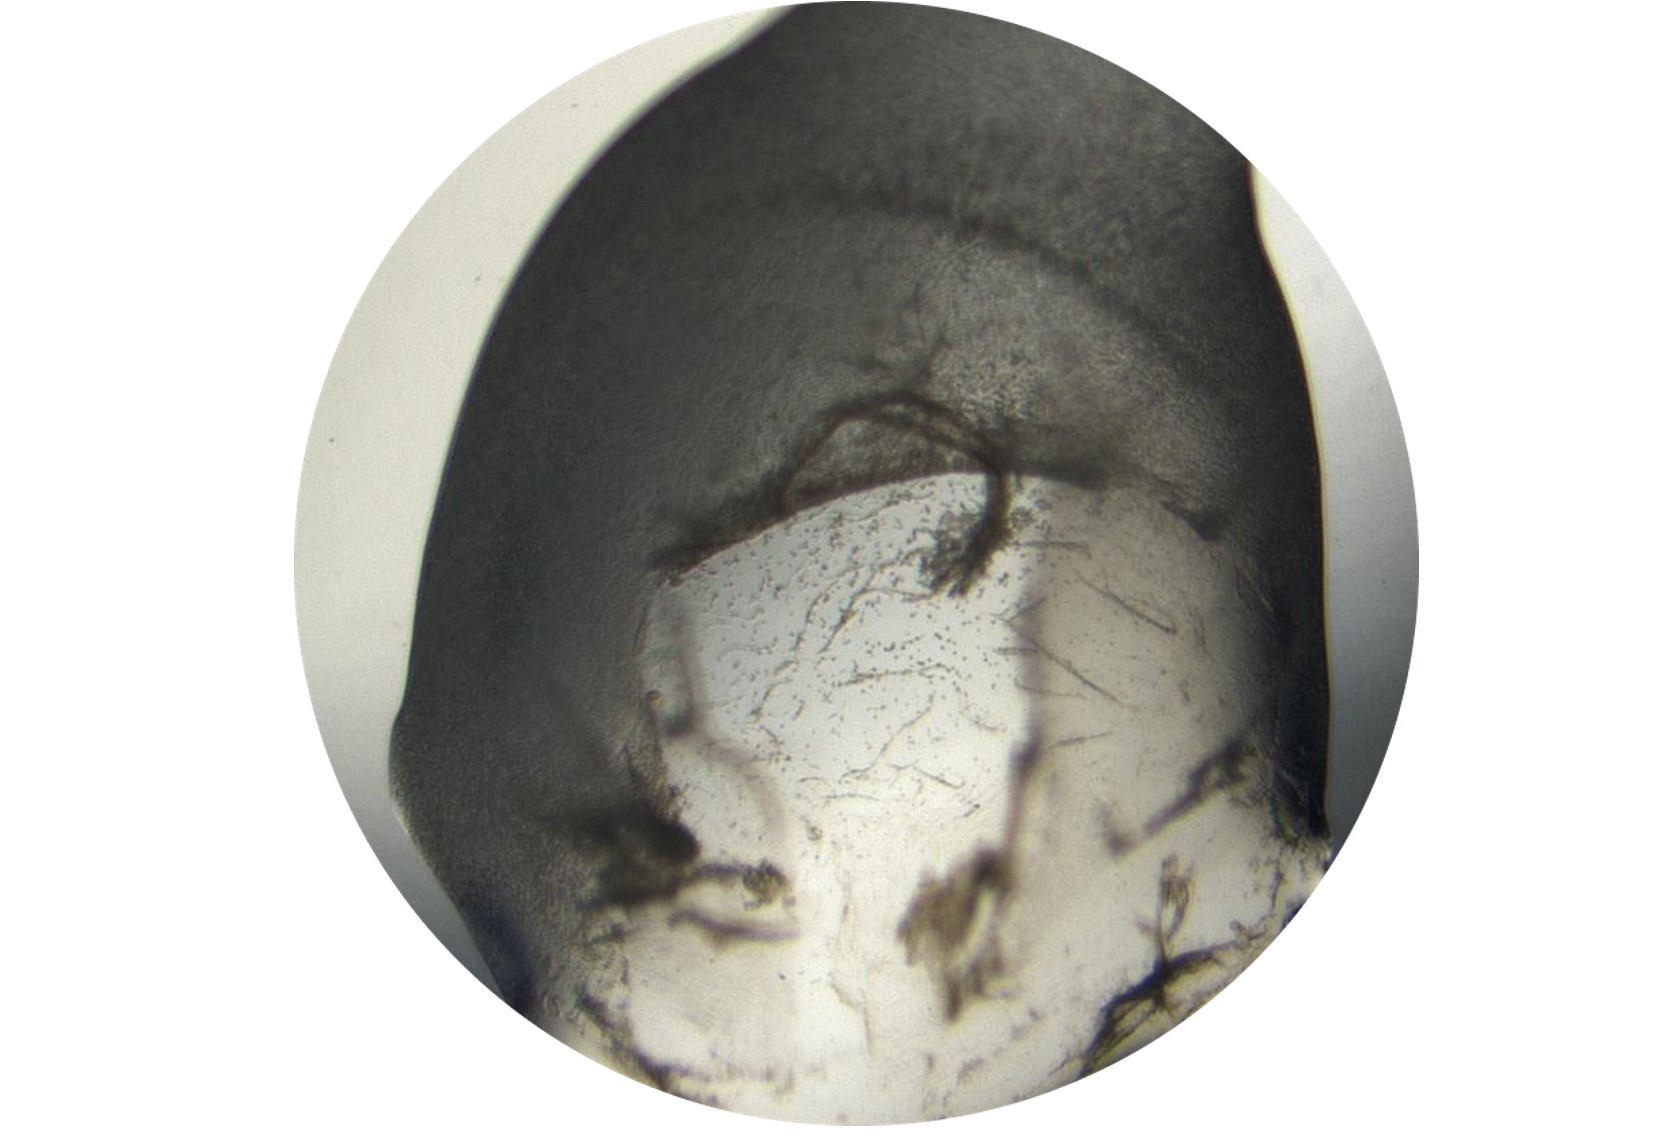

In [5]:
im.show()

In [6]:
width, height = im.size

In [7]:
width,height

(1663, 1141)

In [8]:
left = width*0.22
top = height*0.22
right = width*0.78
bottom = height*0.78

In [9]:
left

365.86

In [10]:
im1 = im.crop((left, top, right, bottom))

In [11]:
type(im1)

PIL.Image.Image

In [1328]:
im1 = im1.save("0.929_cropped.jpg")

In [1329]:
image_path="0.929_cropped.jpg"

with open(image_path, 'rb') as f:         
    data={'image_bytes': [f.read()]}


results = model(data)

In [1330]:
results

{'scores': array([[0.76866394, 0.090648  , 0.08661806, 0.05406997]], dtype=float32),
 'classes': array([[b'Crystals', b'Precipitate', b'Other', b'Clear']], dtype=object)}

In [408]:
fp = fs.open('s3:...')
data = {'image_bytes': [fp.read()]} #read image
results = model(data)

In [409]:
results

{'classes': array([[b'Crystals', b'Clear', b'Precipitate', b'Other']], dtype=object),
 'scores': array([[0.7996753 , 0.15766624, 0.02342066, 0.01923784]], dtype=float32)}

In [172]:
df = pd.DataFrame(image, columns = ['id'])

In [ ]:
df #output the id of image

In [195]:
#open images in the folder
my_list = [] #create my_list to append result
for file in fs.ls('s3:/...'):
    fp = fs.open('s3://' + file) #open file
    data = {'image_bytes': [fp.read()]} #read image
    results = model(data) #call the model
    final_result = results['classes'][0][0] #Slicing the first result
    if final_result.decode("utf-8").find('Crystal') != -1: #transfer the format of result
        my_list.append(str(1))
    else:
        my_list.append(str(0))

In [196]:
my_list

['0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0'

In [197]:
result_list = pd.DataFrame(my_list, columns = ['classify']) #transfer the list to dataframe

In [198]:
result_list

,classify
0,0
1,0
2,0
3,0
4,0
...,...
379,0
380,0
381,0
382,0


In [199]:
df_final = pd.concat([df, result_list], axis = 1) #concat two dataframes

In [200]:
df_final #final result

,id,classify
0,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BASE_171115_080723_1.jpg,0
1,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BRITE_171115_082055_1.jpg,0
2,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BRITE_171115_095702_1.jpg,0
3,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BRITE_171115_185822_1.jpg,0
4,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A02-1_BASE_171115_080731_1.jpg,0
...,...,...
379,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_H11-1_BRITE_171115_190130_1.jpg,0
380,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_H12-1_BASE_171115_081910_1.jpg,0
381,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_H12-1_BRITE_171115_083029_1.jpg,0
382,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_H12-1_BRITE_171115_100115_1.jpg,0


In [201]:
pd.set_option('max_colwidth',1000)

In [205]:
df_final

,id,classify
0,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BASE_171115_080723_1.jpg,0
1,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BRITE_171115_082055_1.jpg,0
2,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BRITE_171115_095702_1.jpg,0
3,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A01-1_BRITE_171115_185822_1.jpg,0
4,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_A02-1_BASE_171115_080731_1.jpg,0
...,...,...
379,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_H11-1_BRITE_171115_190130_1.jpg,0
380,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_H12-1_BASE_171115_081910_1.jpg,0
381,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_H12-1_BRITE_171115_083029_1.jpg,0
382,ingo-images/SMARCA2/Default/xdfp11-001/171115/xdfp11-001_H12-1_BRITE_171115_100115_1.jpg,0


In [208]:
df_final['classify'].value_counts()

0    367
1     17
Name: classify, dtype: int64

In [ ]:
#Whole pipeline

In [ ]:
def search_image(root_path, all_files = []):
    files = fs.ls(root_path) 
    for file in files:
        if not fs.isdir(file):
            all_files.append(file)
        else:
            search_image(file,all_files)
    return all_files
absroot = 'ingo-images/SMARCA2/Default/' #use the file 001
files = search_image(absroot)
my_list = []
for file in files:
    fp = fs.open(file) #open file
    data = {'image_bytes': [fp.read()]} #read image
    results = model(data) #call the model
    final_result = results['classes'][0][0] #Slicing the first result
    if final_result.decode("utf-8").find('Crystal') != -1: #transfer the format of result
        my_list.append(str(1))
    else:
        my_list.append(str(0))
#print(my_list[:1000]) #print the result

In [ ]:
result_list = pd.DataFrame(my_list, columns = ['classify']) #transfer the list to dataframe
result_list

In [ ]:
df = pd.DataFrame(files, columns = ['id']) #list the file
df_final = pd.concat([df, result_list], axis = 1) #concat two dataframes
df_final #final result

In [ ]:
df_final['classify'].value_counts()

In [ ]:
df_final_1 = df_final[df_final['classify']=='1']
df_final_1 = df_final_1.reset_index(drop = "True") # re-index

In [ ]:
df_final_1[["id"]] = df_final_1[["id"]].astype('str')
a = df_final_1["id"]
a_frame = a.to_frame()
#a_frame
my_list_a = []
for i in a:
    fp = fs.open('s3://' + i)
    data = {'image_bytes': [fp.read()]} #read image
    results = model(data) 
    my_list_a.append(results['scores'][0][0])
my_list_a

In [ ]:
my_list_a_df = pd.DataFrame(my_list_a, columns = ['scores'])
df_final_score = pd.concat([a_frame,my_list_a_df], axis = 1)
df_sum = df_final_score.sort_values(by="scores",ascending=False)
df_sum

In [ ]:
df_sum[df_sum['scores'] >= 0.9]

#choose 100 images to crop, and computer the recall and precision rate.